# Географический анализ

## 1. Проанализируйте географическое распределение сделок по городам.

In [58]:
import pandas as pd

deals_df = pd.read_pickle("deals_cleaned_v3.pkl")

In [59]:
# Пример: считаем количество записей по городам
city_counts = deals_df['City'].value_counts()

In [60]:
successful_deals_df = deals_df[(deals_df['Stage'] == 'Payment Done')]

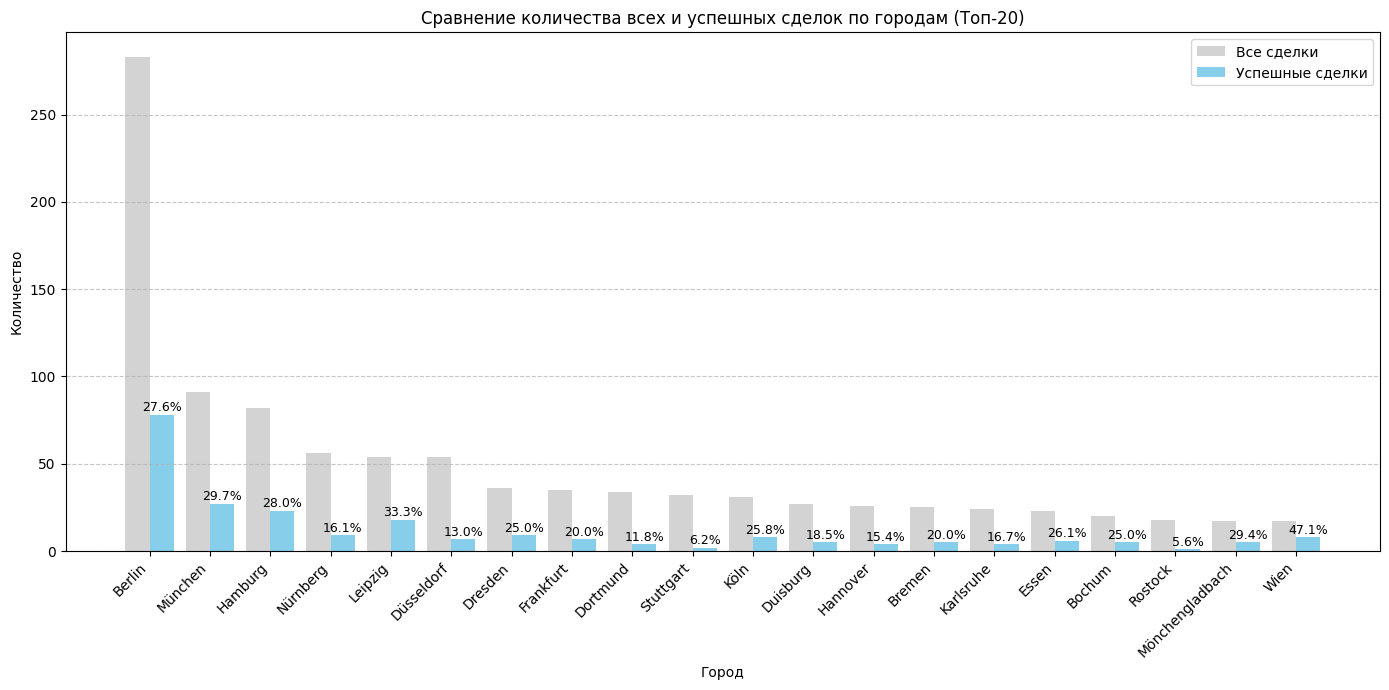

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчёт количества всех и успешных сделок по городам
total_counts = deals_df['City'].value_counts()
success_counts = successful_deals_df['City'].value_counts()

# Оставляем только топ-20 по общему числу сделок
top_20_cities = total_counts.head(20).index

# Фильтрация по топ-20
total_top20 = total_counts[top_20_cities]
success_top20 = success_counts[top_20_cities].reindex(top_20_cities, fill_value=0)

# Построение сравнительного barplot
plt.figure(figsize=(14, 7))
bar_width = 0.4
x = range(len(top_20_cities))

plt.bar(x, total_top20, width=bar_width, label='Все сделки', color='lightgray')
plt.bar([i + bar_width for i in x], success_top20, width=bar_width, label='Успешные сделки', color='skyblue')

plt.xlabel('Город')
plt.ylabel('Количество')
plt.title('Сравнение количества всех и успешных сделок по городам (Топ-20)')
plt.xticks([i + bar_width / 2 for i in x], top_20_cities, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавим подписи с процентами (только проценты успешных от всех)
for i, (total, success) in enumerate(zip(total_top20, success_top20)):
    percent = (success / total * 100) if total != 0 else 0
    plt.text(i + bar_width, success + success * 0.01, f'{percent:.1f}%', ha='center', va='bottom', fontsize=9, color='black')


plt.tight_layout()
plt.show()

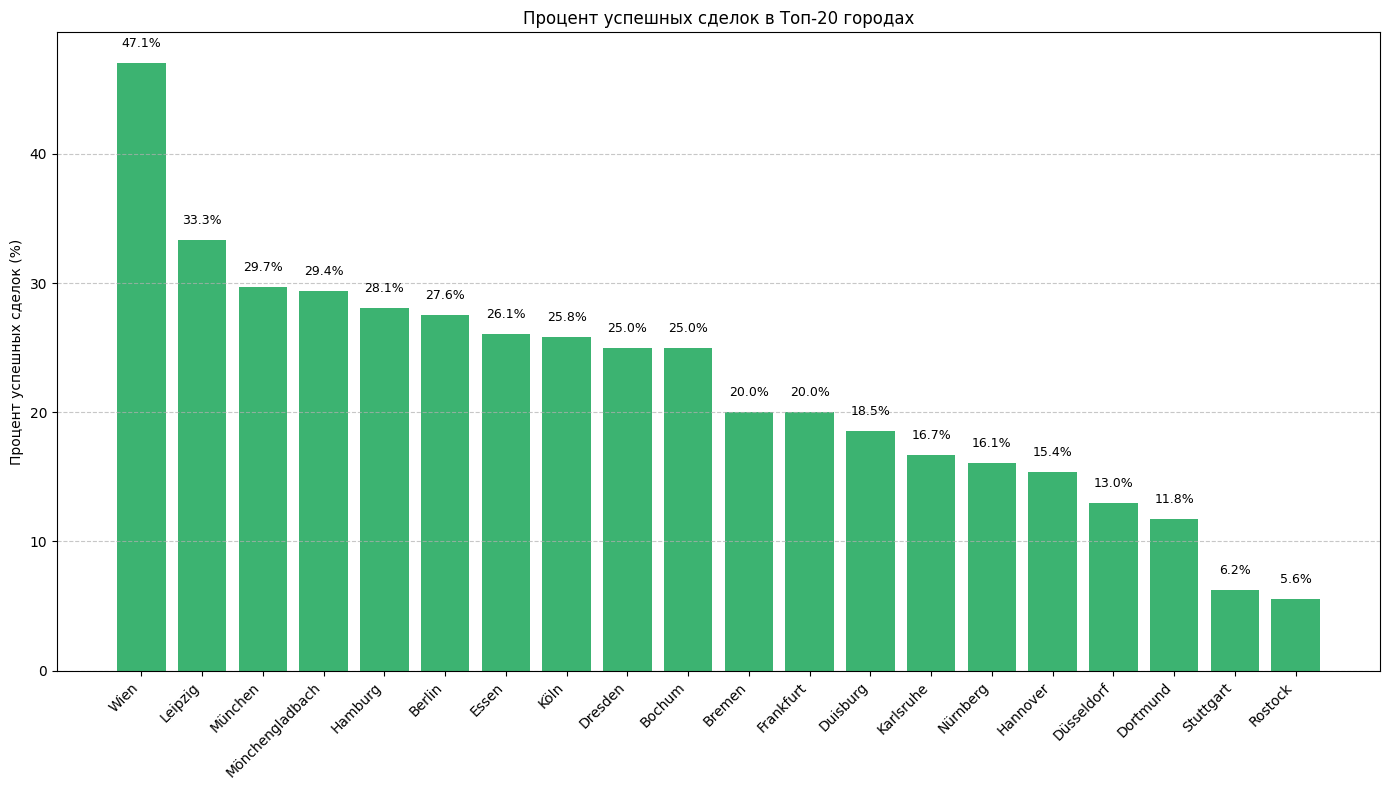

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчёт количества всех и успешных сделок по городам
total_counts = deals_df['City'].value_counts()
success_counts = successful_deals_df['City'].value_counts()

# Оставляем только топ-20 по общему числу сделок
top_20_cities = total_counts.head(20).index

# Фильтрация по топ-20
total_top20 = total_counts[top_20_cities]
success_top20 = success_counts[top_20_cities].reindex(top_20_cities, fill_value=0)

# Рассчёт процента успешных сделок
success_rate = (success_top20 / total_top20 * 100).round(2)

# Сортируем по убыванию
success_rate = success_rate.sort_values(ascending=False)

# Визуализация процента успешных сделок
plt.figure(figsize=(14, 8))
bars = plt.bar(success_rate.index, success_rate, color='mediumseagreen')

plt.ylabel('Процент успешных сделок (%)')
plt.title('Процент успешных сделок в Топ-20 городах')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Добавляем подписи с процентами над столбиками
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 2. Изучите влияние уровня знания немецкого языка на успешность сделок в разных городах.

In [63]:
# Группируем по городу и уровню языка: считаем все сделки
language_grouped = deals_df.groupby(['City', 'Level of Deutsch'], observed=False).size().reset_index(name='Total Deals')
language_grouped

,City,Level of Deutsch,Total Deals
0,Aachen,A0,0
1,Aachen,A0-A1,0
2,Aachen,A1,0
3,Aachen,A1-A2,0
4,Aachen,A2,1
...,...,...,...
11318,Śrem,B2,0
11319,Śrem,B2-C1,0
11320,Śrem,B2-C2,0
11321,Śrem,C1,0


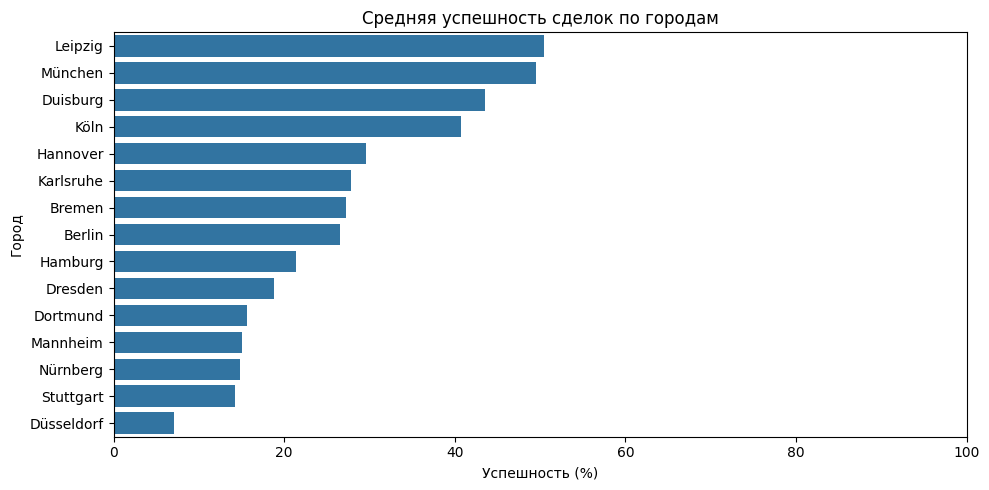

In [64]:
# --- Barplot по городам ---
plt.figure(figsize=(10, 5))
avg_success_by_city = filtered_by_lang.groupby('City')['Success Rate %'].mean().sort_values(ascending=False)
sns.barplot(x=avg_success_by_city.values, y=avg_success_by_city.index)
plt.title("Средняя успешность сделок по городам")
plt.xlabel("Успешность (%)")
plt.ylabel("Город")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

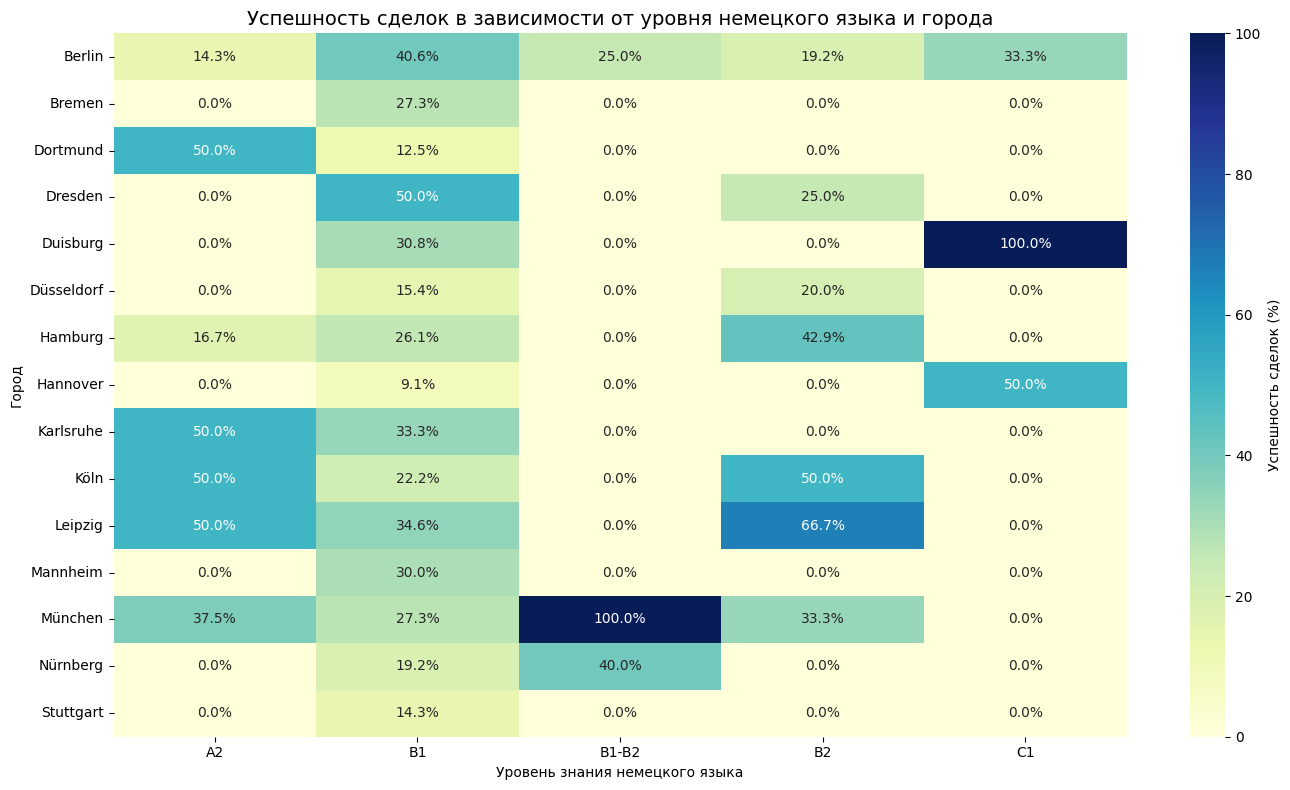

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Фильтрация по уровням с хотя бы 10 сделками
level_counts = merged_top.groupby('Level of Deutsch', observed=True)['Total Deals'].sum()
valid_levels = level_counts[level_counts >= 10].index
filtered = merged_top[merged_top['Level of Deutsch'].isin(valid_levels)]

# Поворот таблицы
pivot_table = filtered.pivot(index='City', columns='Level of Deutsch', values='Success Rate %').fillna(0)

# Создаём аннотации с процентным знаком
annot = pivot_table.apply(lambda col: col.map(lambda x: f"{x:.1f}%"))

# --- Тепловая карта с подписями ---
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=annot, fmt="", cmap="YlGnBu", cbar_kws={'label': 'Успешность сделок (%)'})
plt.title("Успешность сделок в зависимости от уровня немецкого языка и города", fontsize=14)
plt.xlabel("Уровень знания немецкого языка")
plt.ylabel("Город")
plt.tight_layout()
plt.show()

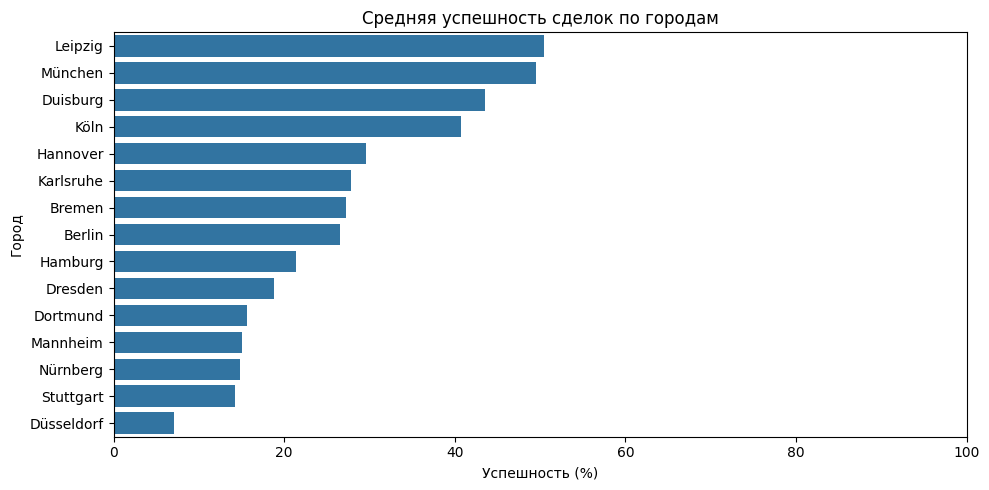

In [66]:
# --- Barplot по городам ---
plt.figure(figsize=(10, 5))
avg_success_by_city = filtered.groupby('City')['Success Rate %'].mean().sort_values(ascending=False)
sns.barplot(x=avg_success_by_city.values, y=avg_success_by_city.index)
plt.title("Средняя успешность сделок по городам")
plt.xlabel("Успешность (%)")
plt.ylabel("Город")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()